In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [24]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [25]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [26]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [27]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [28]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [29]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [30]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

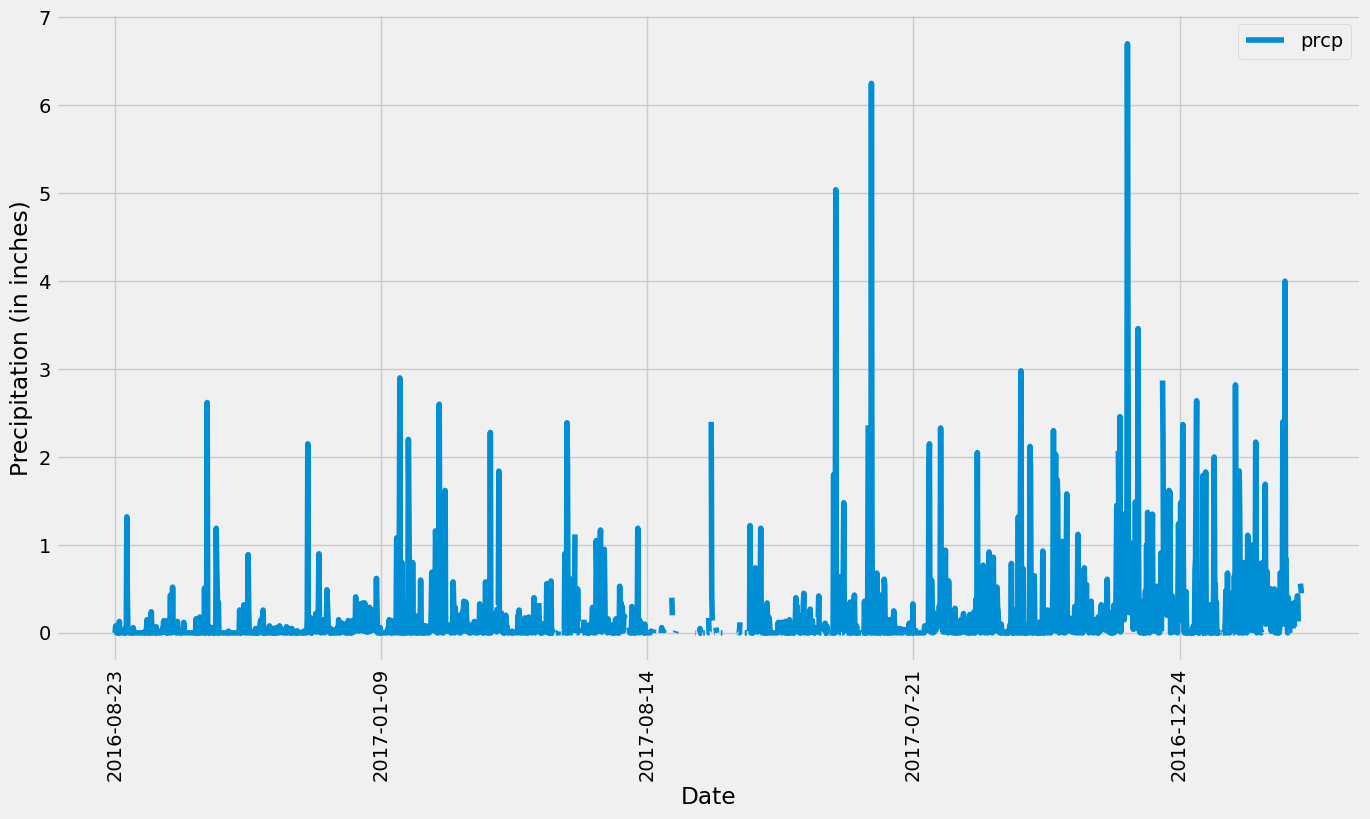

In [80]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
end_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
start_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= start_date).\
    filter(measurement.date <= end_date)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(query)

# Sort the dataframe by date
df.set_index('date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(15, 8))
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Precipitation (in inches)")
plt.show()

In [44]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [49]:
# Design a query to calculate the total number stations in the dataset
query_total = session.query(station.id).count()
print(query_total)

9


In [53]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
query_active = session.query(measurement.station, func.count(measurement.station)) \
                        .group_by(measurement.station) \
                        .order_by(func.count(measurement.station).desc()) \
                        .all()
for station, count in query_active:
    print(f"Station {station}: {count} rows")

Station USC00519281: 2772 rows
Station USC00519397: 2724 rows
Station USC00513117: 2709 rows
Station USC00519523: 2669 rows
Station USC00516128: 2612 rows
Station USC00514830: 2202 rows
Station USC00511918: 1979 rows
Station USC00517948: 1372 rows
Station USC00518838: 511 rows


In [59]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = 'USC00519281'
temperatures = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)) \
                .filter(measurement.station == active_station) \
                .all()
for lowest_temp, highest_temp, avg_temp in temperatures:
    print(f"Lowest temperature: {lowest_temp}")
    print(f"Highest temperature: {highest_temp}")
    print(f"Average temperature: {avg_temp}")

Lowest temperature: 54.0
Highest temperature: 85.0
Average temperature: 71.66378066378067


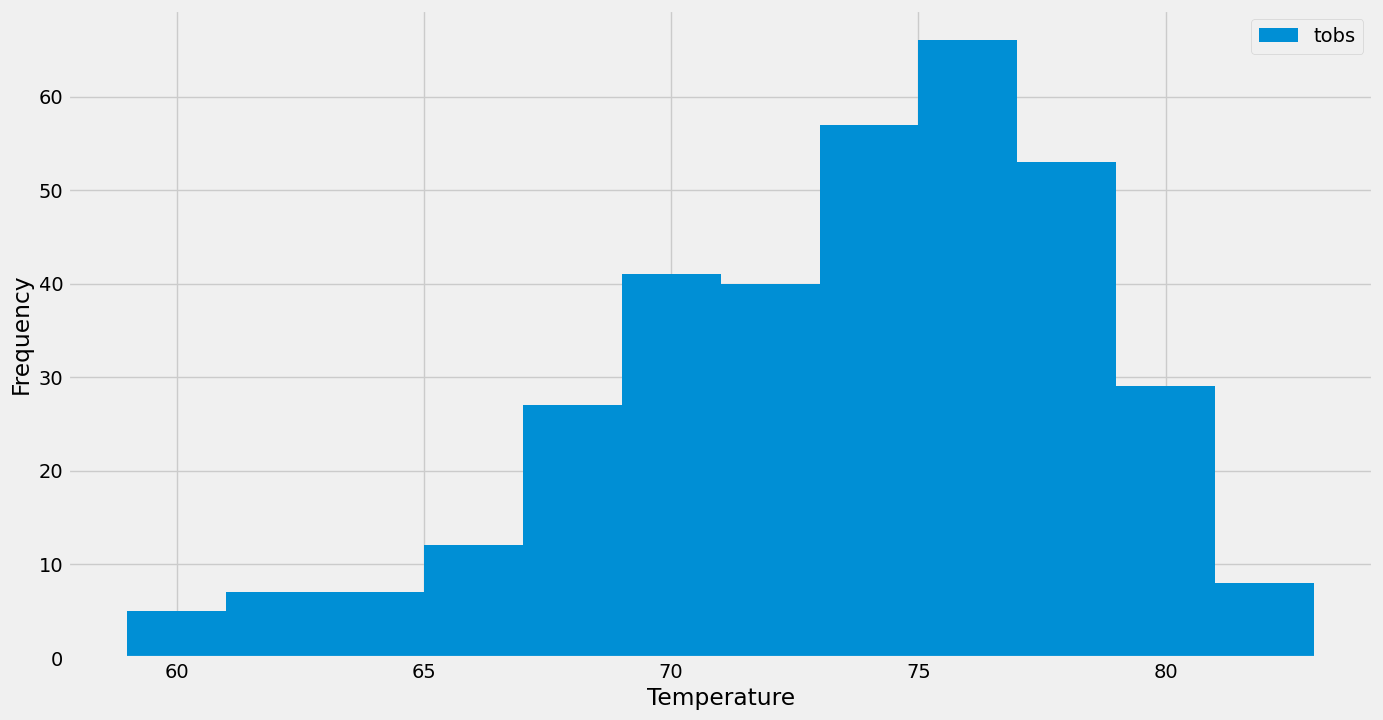

In [82]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query_observation = session.query(measurement.tobs) \
                        .filter(measurement.station == active_station) \
                        .filter(measurement.date >= (dt.date(2017, 8, 23) - dt.timedelta(days=365))) \
                        .all()
histogram_df = pd.DataFrame(query_observation)
histogram_df.plot.hist(bins=12, figsize=(15,8))
plt.xlabel('Temperature')
plt.show()

# Close session

In [70]:
# Close Session
session.close()